U ovom kodu smo koristili vestacko generisane slike tako sto smo  ImageDataGenerator. 
Klasa ImageDataGenerator u Kerasu omogućava različite tehnike augmentacije podataka, poput rotacije, skaliranja, horizontalnog i vertikalnog zrcaljenja, promene svetline i kontrasta, što pomaže u obogaćivanju skupa podataka i poboljšanju generalizacije modela.
Ovim smo pobosljali nas program i smajili val_loss koji je u proslom bio veci, a sada sveden na minimum. 

Sto se tice samih rezultata dosta su uspesni i odlicno predvidja slike. Jedino sto mozemo primetiti da model sporije uci kroz epohe u poredjenju sa programom bez vestacko generisanih slika. Preciznost je nakon 10 epoha bila 80% dok smo bez vestacko generisanih bilo 100%, ali smo zato sada smanjili gubitke.


In [1]:
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt

# Putanja do osnovnog direktorija dataset-a
glavni_dir = pathlib.Path('test')

# Definisanje parametara za obradu slika
batch_size = 32
visina_slike = 256
sirina_slike = 256

# Kreiranje ImageDataGenerator-a za trening set
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3)  # Dodat parametar za podelu podataka

# Kreiranje ImageDataGenerator-a za validacioni set
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3)  # Dodat parametar za podelu podataka

# Priprema skupa podataka za treniranje
train_ds = train_datagen.flow_from_directory(
    glavni_dir,
    target_size=(visina_slike, sirina_slike),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',  # Specifikacija da je ovo deo za treniranje
    seed=123)

# Priprema skupa podataka za validaciju
val_ds = validation_datagen.flow_from_directory(
    glavni_dir,
    target_size=(visina_slike, sirina_slike),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',  # Specifikacija da je ovo deo za validaciju
    seed=123)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    glavni_dir,  
    target_size=(visina_slike, sirina_slike),
    batch_size=batch_size,  
    class_mode='binary', 
    subset=None,  
    shuffle=False,  
    seed=123) 

# Spremanje imena klasa
class_names = list(train_ds.class_indices.keys())
print(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(visina_slike, sirina_slike, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))  
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


2024-03-18 21:09:37.818736: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1189 images belonging to 19 classes.
Found 494 images belonging to 19 classes.
Found 1683 images belonging to 19 classes.
['Deimos', 'Enkelad', 'Evropa', 'Fobos', 'Ganimed', 'Io', 'Jupiter', 'Kalisto', 'Mars', 'Merkur', 'Mesec', 'Mimant', 'Neptun', 'Reja', 'Saturn', 'Titan', 'Uran', 'Venera', 'Zemlja']


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.2660 - loss: 2.3797 - val_accuracy: 0.5506 - val_loss: 1.2535
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.6170 - loss: 1.1793 - val_accuracy: 0.6073 - val_loss: 1.0971
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.6677 - loss: 0.9799 - val_accuracy: 0.7105 - val_loss: 0.8562
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.7153 - loss: 0.8736 - val_accuracy: 0.7105 - val_loss: 0.8803
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.7254 - loss: 0.7324 - val_accuracy: 0.8279 - val_loss: 0.7035
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.7902 - loss: 0.6066 - val_accuracy: 0.8097 - val_loss: 0.6086
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.7817 - loss: 0.6304 - val_accuracy: 0.8381 - val_loss: 0.6008
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.8198 - loss: 0.5143 - val_accuracy: 0.8482 - val_loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


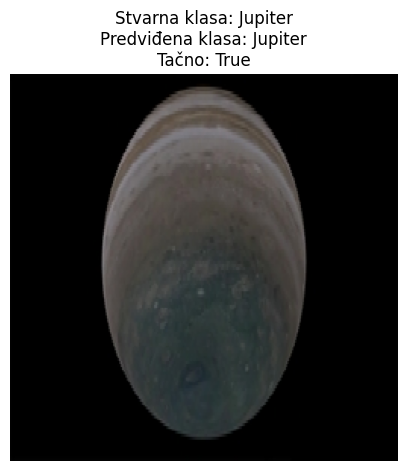

Stvarna klasa: Jupiter, Predviđena klasa: Jupiter, Tačno: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


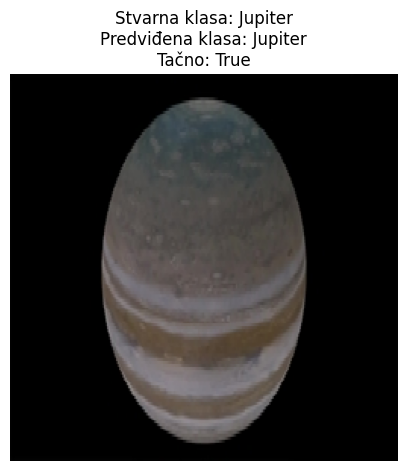

Stvarna klasa: Jupiter, Predviđena klasa: Jupiter, Tačno: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


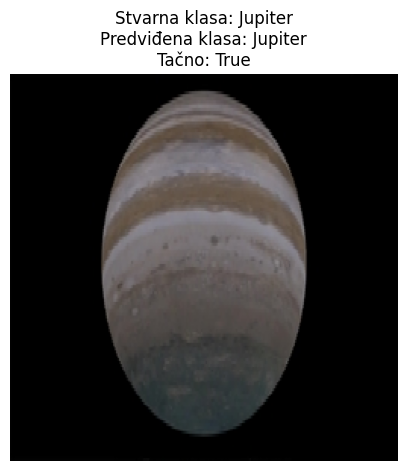

Stvarna klasa: Jupiter, Predviđena klasa: Jupiter, Tačno: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


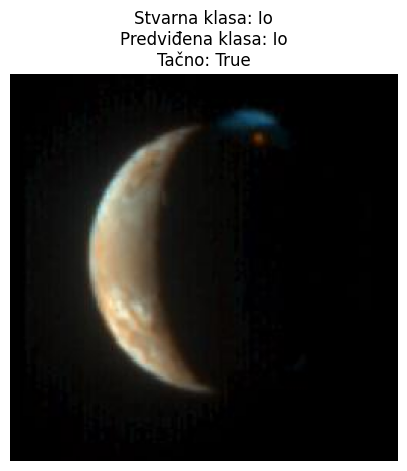

Stvarna klasa: Io, Predviđena klasa: Io, Tačno: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


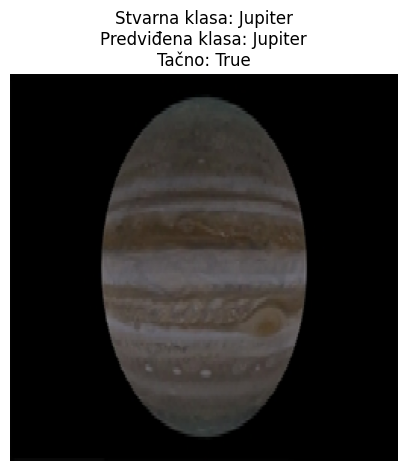

Stvarna klasa: Jupiter, Predviđena klasa: Jupiter, Tačno: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


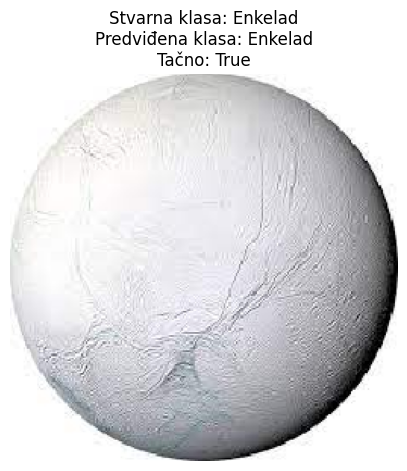

Stvarna klasa: Enkelad, Predviđena klasa: Enkelad, Tačno: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


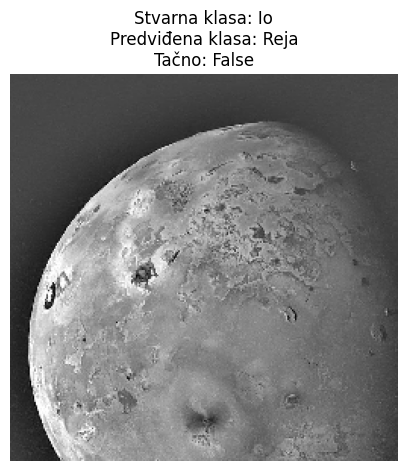

Stvarna klasa: Io, Predviđena klasa: Reja, Tačno: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


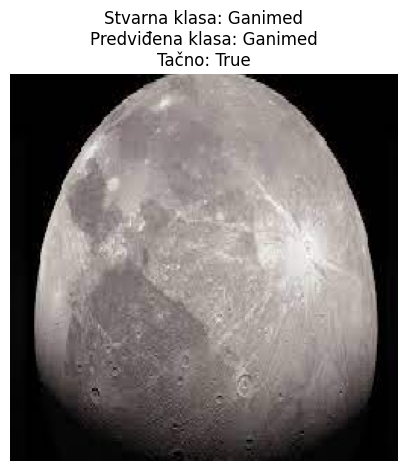

Stvarna klasa: Ganimed, Predviđena klasa: Ganimed, Tačno: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


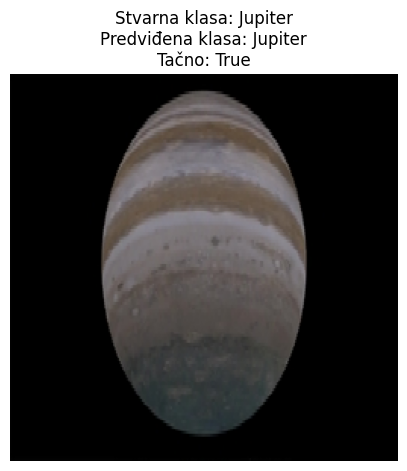

Stvarna klasa: Jupiter, Predviđena klasa: Jupiter, Tačno: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


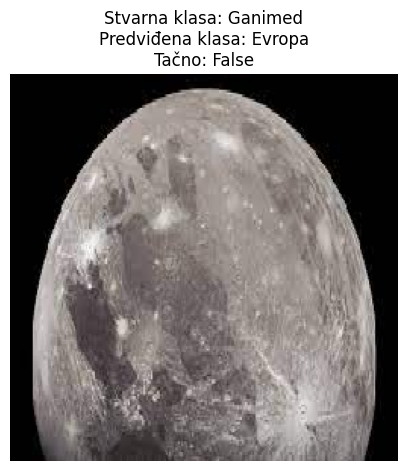

Stvarna klasa: Ganimed, Predviđena klasa: Evropa, Tačno: False
Procenat tačnosti: 80.00%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


tacna_predikcija = 0
ukupna_predikcija = 0


num_images_to_test = 400 

# Prikupljanje slika i labele iz testnog skupa
test_images = []
test_labels = []
count = 0
for images, labels in test_ds:  
    for i in range(images.shape[0]):  # Iteracija kroz sve slike u batch-u
        if count >= num_images_to_test:
            break  # Prekida se kada se dostigne željeni broj slika
        test_images.append(images[i])
        test_labels.append(labels[i])

        count += 1
    if count >= num_images_to_test:
        break  # Takođe prekida spoljnu petlju

indices = np.random.choice(range(len(test_images)), 10, replace=False)


for i in indices:
    img = test_images[i]
    true_label_index = test_labels[i]
    true_label = class_names[int(true_label_index)]


    # Normalizacija slike za prikaz, ako je potrebno
    img_to_show = img
    if img_to_show.max() > 1.0:
        img_to_show = img_to_show / 255.0

    img_array = np.expand_dims(img, axis=0)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Provera da li je predviđena klasa tačna
    is_correct = true_label == predicted_class
    if is_correct:
        tacna_predikcija += 1
    ukupna_predikcija += 1

    plt.figure(figsize=(5, 6))
    plt.imshow(img_to_show)
    plt.title(f"Stvarna klasa: {true_label}\nPredviđena klasa: {predicted_class}\nTačno: {is_correct}")
    plt.axis('off')
    plt.show()

    print(f"Stvarna klasa: {true_label}, Predviđena klasa: {predicted_class}, Tačno: {is_correct}")

# Izračunavanje i prikazivanje procenta tačnosti
prezicnost = (tacna_predikcija / ukupna_predikcija) * 100
print(f"Procenat tačnosti: {prezicnost:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

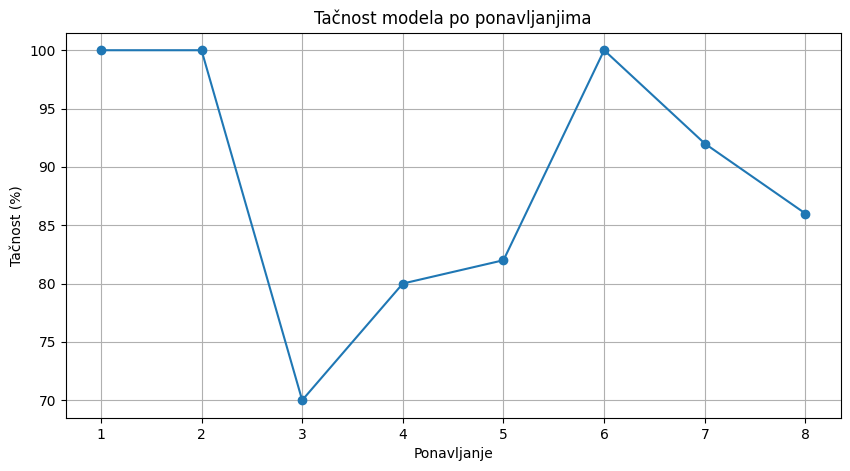

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definisanje parametara za testiranje
broj_ponavljanja = 8
broj_slika = 50
tacnost = []

# Glavna petlja za višestruko testiranje
for trial in range(broj_ponavljanja):
    tacna_predikcija = 0
    ukupna_predikcija = 0
    # Prikupljanje slika i oznaka iz testnog skupa
    test_images = []
    test_labels = []
    count = 0
    for images, labels in test_ds:  
        indices = np.random.choice(images.shape[0], min(images.shape[0], broj_slika), replace=False)
        for i in indices:
            test_images.append(images[i])
            test_labels.append(labels[i])
            count += 1
            if count >= broj_slika:
                break
        if count >= broj_slika:
            break

    # Provera predikcija modela za svaku sliku
    for i in range(broj_slika):
        img_array = np.expand_dims(test_images[i], axis=0)  # Pretvaranje slike u batch od jedne slike
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        true_label = test_labels[i]
        if predicted_class_index == true_label:
            tacna_predikcija += 1
        ukupna_predikcija += 1

    # Izračunavanje i čuvanje tačnosti za trenutno ponavljanje
    tacnost_ponavljanja = (tacna_predikcija / ukupna_predikcija) * 100
    tacnost.append(tacnost_ponavljanja)

# Crtanje grafika tačnosti za svako ponavljanje
plt.figure(figsize=(10, 5))
plt.plot(range(1, broj_ponavljanja + 1), tacnost, marker='o')
plt.title('Tačnost modela po ponavljanjima')
plt.xlabel('Ponavljanje')
plt.ylabel('Tačnost (%)')
plt.grid(True)
plt.show()
